In [140]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [141]:
df = pd.read_csv("D:\movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [142]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [143]:
df = df.fillna(0)
df.columns = ['Color', 'Director Name','Critic for reviews','Duration','Director FB likes','Actor 3 FB likes','Actor 2 name', 'Actor 1 FB likes','Gross','Genres','Actor 1 name','Movie Title','Voted Users','Cast tot FB likes','Actor 3 name','Faces in poster','Plot Keywords','Movie IMDB link','User for reviews','Language','Country','Content Rating','Budget', 'Year','Actor 2 FB likes','IMDB Score','Aspect Ratio','Movie FB likes']
df.head(5)

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Gross,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0,0.0,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
Color                 5043 non-null object
Director Name         5043 non-null object
Critic for reviews    5043 non-null float64
Duration              5043 non-null float64
Director FB likes     5043 non-null float64
Actor 3 FB likes      5043 non-null float64
Actor 2 name          5043 non-null object
Actor 1 FB likes      5043 non-null float64
Gross                 5043 non-null float64
Genres                5043 non-null object
Actor 1 name          5043 non-null object
Movie Title           5043 non-null object
Voted Users           5043 non-null int64
Cast tot FB likes     5043 non-null int64
Actor 3 name          5043 non-null object
Faces in poster       5043 non-null float64
Plot Keywords         5043 non-null object
Movie IMDB link       5043 non-null object
User for reviews      5043 non-null float64
Language              5043 non-null object
Country               5043 

In [145]:
df["Gross in millions"] = (df["Gross"])/1000000
df.head()

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Gross,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,760.505847
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,309.404152
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,200.074175
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,448.130642
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0,0.0,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0,0.000000


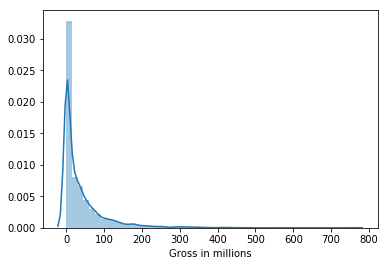

In [146]:
sns.distplot(df['Gross in millions'])

In [147]:
df.corr()

,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 1 FB likes,Gross,Voted Users,Cast tot FB likes,Faces in poster,User for reviews,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
Critic for reviews,1.000000,0.269515,0.184912,0.273082,0.193252,0.524832,0.626616,0.266110,-0.033915,0.611972,0.127850,0.153433,0.284345,0.299677,0.054952,0.682606,0.524832
Duration,0.269515,1.000000,0.161133,0.123773,0.089176,0.254709,0.313818,0.123135,0.004436,0.329743,0.074762,0.262090,0.131826,0.256352,-0.017209,0.195693,0.254709
Director FB likes,0.184912,0.161133,1.000000,0.121292,0.092366,0.149952,0.298055,0.121109,-0.041226,0.223888,0.024600,0.032860,0.121068,0.162468,0.006024,0.162102,0.149952
Actor 3 FB likes,0.273082,0.123773,0.121292,1.000000,0.250430,0.321735,0.287875,0.474347,0.100464,0.231211,0.051264,0.032419,0.559979,0.051900,0.020989,0.279233,0.321735
Actor 1 FB likes,0.193252,0.089176,0.092366,0.250430,1.000000,0.167311,0.193095,0.951670,0.072944,0.146779,0.027286,0.054500,0.390767,0.075833,0.001527,0.135529,0.167311
Gross,0.524832,0.254709,0.149952,0.321735,0.167311,1.000000,0.651528,0.259750,-0.023950,0.582930,0.123506,0.093720,0.284070,0.176445,0.025897,0.392634,1.000000
Voted Users,0.626616,0.313818,0.298055,0.287875,0.193095,0.651528,1.000000,0.265911,-0.026707,0.798750,0.087479,0.058667,0.271208,0.410965,0.045264,0.537924,0.651528
Cast tot FB likes,0.266110,0.123135,0.121109,0.474347,0.951670,0.259750,0.265911,1.000000,0.091908,0.208008,0.041838,0.059934,0.628600,0.085787,0.010391,0.209786,0.259750
Faces in poster,-0.033915,0.004436,-0.041226,0.100464,0.072944,-0.023950,-0.026707,0.091908,1.000000,-0.068280,-0.018963,-0.018774,0.072270,-0.062211,0.001825,0.007821,-0.023950
User for reviews,0.611972,0.329743,0.223888,0.231211,0.146779,0.582930,0.798750,0.208008,-0.068280,1.000000,0.093037,0.072721,0.220632,0.289780,0.044807,0.401199,0.582930


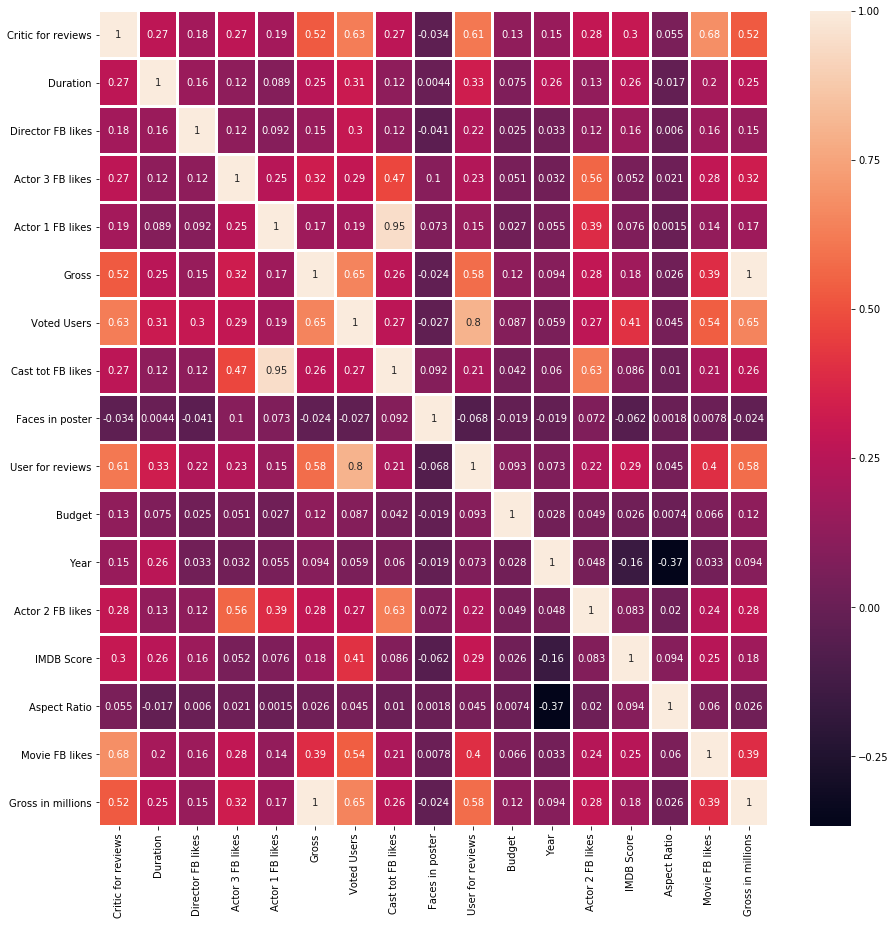

In [148]:
fig, ax = plt.subplots(figsize=(15,15))

correlation_matrix = df.corr()

sns.heatmap(data=correlation_matrix, annot=True, linewidths=2)

In [149]:
df2 = df
df2 = df2.drop(['Gross'], axis = 1) 

df2.head()

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,760.505847
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,309.404152
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,200.074175
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,448.130642
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0,0.0,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0,0.000000


In [150]:
df3 = df2.drop(['Color', 'Director Name','Actor 2 name','Genres','Actor 1 name','Movie Title','Actor 3 name','Plot Keywords','Movie IMDB link','Language','Country','Content Rating','Duration','Director FB likes','Actor 3 FB likes','Actor 1 FB likes','Cast tot FB likes','Faces in poster','Year','Actor 2 FB likes','Budget','IMDB Score','Aspect Ratio','Movie FB likes'],axis=1)
df3.head()

,Critic for reviews,Voted Users,User for reviews,Gross in millions
0,723.0,886204,3054.0,760.505847
1,302.0,471220,1238.0,309.404152
2,602.0,275868,994.0,200.074175
3,813.0,1144337,2701.0,448.130642
4,0.0,8,0.0,0.000000


In [151]:
#df2 = df2.drop(['color', 'director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','title_year','actor_2_facebook_likes','budget','imdb_score','aspect_datio','movie_facebook_likes'], axis = 1) 
X = df3.drop('Gross in millions', axis = 1)
y = df3['Gross in millions']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [153]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
predictions = lm.predict(X_test)

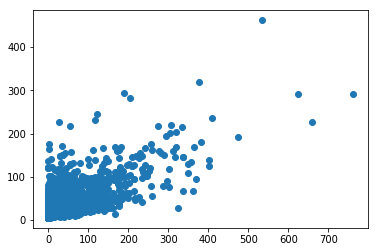

In [155]:
plt.scatter(y_test,predictions)

In [156]:
print(lm.coef_)

[0.09554036 0.00019424 0.01494669]


In [157]:
dfAP = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   
dfAP

,Actual,Predicted
54,317.011114,145.320759
1859,1.075288,11.213453
587,136.448821,34.006167
4329,0.000000,7.863382
2118,4.398392,41.965278
3369,25.926543,25.147694
667,69.688384,21.859218
2174,56.667870,157.601193
3573,0.000000,6.846312
1819,0.000000,17.129146


In [158]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
Critic for reviews,0.095540
Voted Users,0.000194
User for reviews,0.014947


In [159]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)
r2

0.4695903702608377

Text(0, 0.5, 'Movie title')

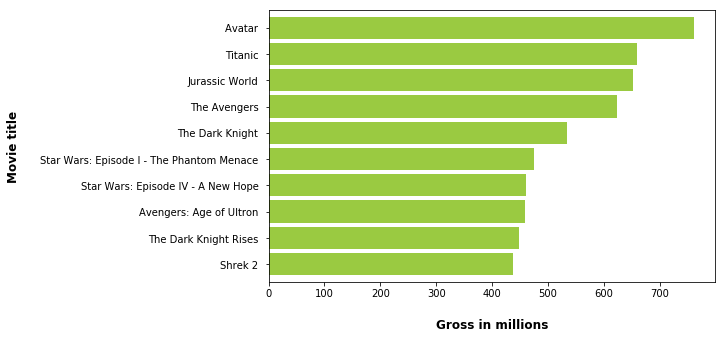

In [161]:
## Visualizar las películas más taquilleras
x = df.groupby('Movie Title')['Gross in millions'].mean().sort_values().tail(10)

ax = x.plot(kind='barh', figsize=(8, 5), color='#9aca41', zorder=2, width=0.85)
ax.set_xlabel("Gross in millions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Movie title", labelpad=20, weight='bold', size=12)

In [162]:
sort_by_gross = df.sort_values('Gross',ascending=False)

sort_by_gross.head(10)

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Gross,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,760.505847
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,658.672302
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,652.177271
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,623.279547
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,623.279547
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,533.316061
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,474.544677
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,460.935665
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,458.991599
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,448.130642


Text(0, 0.5, 'Country')

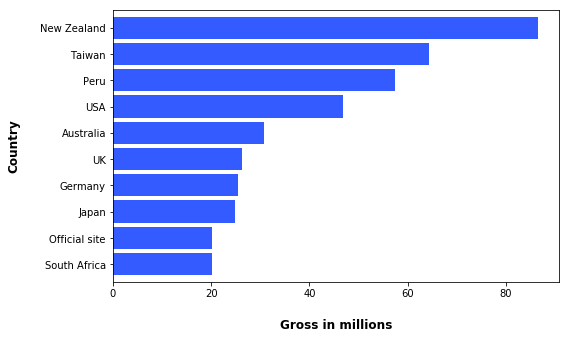

In [163]:
## Visualzar mediana de taquillas por país
x = df.groupby('Country')['Gross in millions'].mean().sort_values().tail(10)
#x.plot(kind='barh')
ax = x.plot(kind='barh', figsize=(8, 5), color='#335BFF', zorder=2, width=0.85)
ax.set_xlabel("Gross in millions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12)

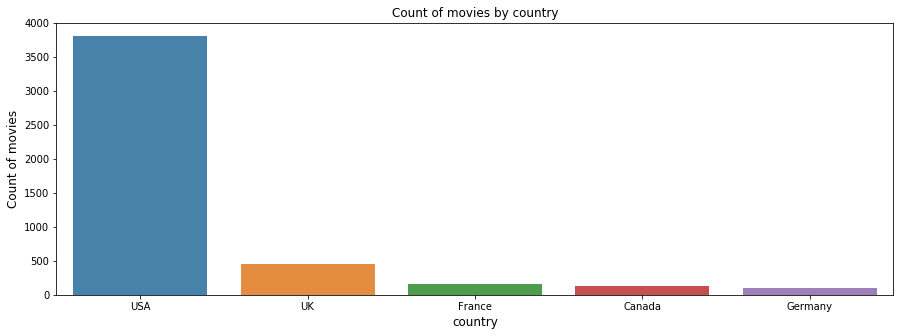

In [164]:
#ver cantidad de películas por país
country_count  = df['Country'].value_counts()
country_count = country_count[:5,]
plt.figure(figsize=(15,5))
snsplot = sns.barplot(country_count.index, country_count.values, alpha=0.9)
plt.title('Count of movies by country')
plt.ylabel('Count of movies', fontsize=12)
plt.xlabel('country', fontsize=12)

plt.show()




In [165]:
#Ver qué peliculas son las de Nueva Zelanda
is_NZ =  df['Country']=="New Zealand"
df_NZ = df[is_NZ]
df_NZ

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Gross,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
20,Color,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000.0,255108370.0,Adventure|Fantasy,Aidan Turner,The Hobbit: The Battle of the Five Armies,354228,9152,James Nesbitt,0.0,army|elf|hobbit|middle earth|orc,http://www.imdb.com/title/tt2310332/?ref_=fn_t...,802.0,English,New Zealand,PG-13,250000000.0,2014.0,972.0,7.5,2.35,65000,255.108370
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,218.051260
270,Color,Peter Jackson,297.0,171.0,0.0,857.0,Orlando Bloom,16000.0,313837577.0,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,Billy Boyd,2.0,elf|hobbit|middle earth|quest|ring,http://www.imdb.com/title/tt0120737/?ref_=fn_t...,5060.0,English,New Zealand,PG-13,93000000.0,2001.0,5000.0,8.8,2.35,21000,313.837577
1174,Color,Sngmoo Lee,95.0,100.0,19.0,433.0,Dong-gun Jang,624.0,5664251.0,Action|Fantasy|Western,Tony Cox,The Warrior's Way,22309,2056,Jed Brophy,1.0,bullet time|explosion|knife throwing|throwing ...,http://www.imdb.com/title/tt1032751/?ref_=fn_t...,102.0,English,New Zealand,R,45000000.0,2010.0,489.0,6.3,2.35,0,5.664251
1993,Color,Roger Donaldson,126.0,127.0,79.0,50.0,Antony Starr,12000.0,5128124.0,Biography|Drama|Sport,Anthony Hopkins,The World's Fastest Indian,44198,12574,Craig Hall,1.0,mortgage|motorcycle|speed|trailer|utah,http://www.imdb.com/title/tt0412080/?ref_=fn_t...,251.0,English,New Zealand,PG-13,25000000.0,2005.0,506.0,7.9,2.35,11000,5.128124
2049,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316020,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0,218.051260
3469,Color,Jane Campion,83.0,121.0,319.0,11.0,Ian Mune,1000.0,40158000.0,Drama|Music|Romance,Holly Hunter,The Piano,63931,1051,Geneviève Lemon,1.0,adultery|daughter|male rear nudity|new zealand...,http://www.imdb.com/title/tt0107822/?ref_=fn_t...,241.0,English,New Zealand,R,7000000.0,1993.0,18.0,7.6,1.85,0,40.158000
3573,Color,Ian Sharp,12.0,102.0,9.0,368.0,Jed Brophy,1000.0,0.0,Action|Adventure|Drama|Western,Ray Winstone,Tracker,2892,1904,Temuera Morrison,0.0,one word title,http://www.imdb.com/title/tt1414378/?ref_=fn_t...,18.0,English,New Zealand,R,6500000.0,2010.0,433.0,6.5,2.35,830,0.000000
3775,Color,Peter Jackson,93.0,108.0,0.0,88.0,Jed Brophy,14000.0,3049135.0,Biography|Crime|Drama|Romance|Thriller,Kate Winslet,Heavenly Creatures,50197,14574,Liz Mullane,2.0,fantasy life|friend|friendship|love|teenage crush,http://www.imdb.com/title/tt0110005/?ref_=fn_t...,265.0,English,New Zealand,R,5000000.0,1994.0,433.0,7.4,2.35,0,3.049135
3840,Color,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,William Kircher,Out of the Blue,2776,122,Paul Glover,0.0,true crime,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,0,0.0,2006.0,10.0,7.3,1.85,285,0.000728


Text(0, 0.5, 'Content Rating')

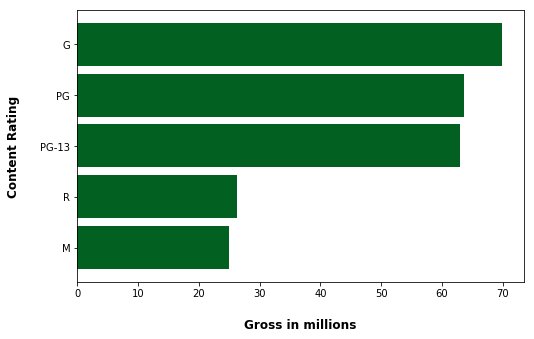

In [166]:
## Visualzar mediana de ganancias por clasificación
x = df.groupby('Content Rating')['Gross in millions'].mean().sort_values().tail(5)
#x.plot(kind='barh')
ax = x.plot(kind='barh', figsize=(8, 5), color='#026021', zorder=2, width=0.85)
ax.set_xlabel("Gross in millions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Content Rating", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Director Name')

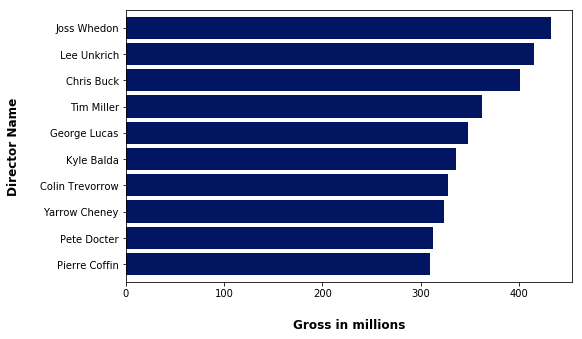

In [167]:
## Visualzar mediana de ganancias por director
x = df.groupby('Director Name')['Gross in millions'].mean().sort_values().tail(10)
#x.plot(kind='barh')
ax = x.plot(kind='barh', figsize=(8, 5), color='#021560', zorder=2, width=0.85)
ax.set_xlabel("Gross in millions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Director Name", labelpad=20, weight='bold', size=12)

In [168]:
#Ver qué peliculas son las de Joss Whedon
is_JW =  df['Director Name']=="Joss Whedon"
df_JW = df[is_JW]
df_JW

,Color,Director Name,Critic for reviews,Duration,Director FB likes,Actor 3 FB likes,Actor 2 name,Actor 1 FB likes,Gross,Genres,Actor 1 name,Movie Title,Voted Users,Cast tot FB likes,Actor 3 name,Faces in poster,Plot Keywords,Movie IMDB link,User for reviews,Language,Country,Content Rating,Budget,Year,Actor 2 FB likes,IMDB Score,Aspect Ratio,Movie FB likes,Gross in millions
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,458.991599
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,623.279547
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,623.279547
1334,Color,Joss Whedon,276.0,119.0,0.0,279.0,Sean Maher,2000.0,25335935.0,Action|Adventure|Sci-Fi|Thriller,Adam Baldwin,Serenity,242599,2853,Michael Hitchcock,0.0,alliance|cannibalism|future|operative|planet,http://www.imdb.com/title/tt0379786/?ref_=fn_t...,1594.0,English,USA,PG-13,40000000.0,2005.0,505.0,8.0,2.35,14000,25.335935
